<a href="https://colab.research.google.com/github/pelinbalci/TF_Intro/blob/main/lecture_4_classify_complex_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab5-Using-Convolutions-With-Complex-Images.ipynb

We can use ImageDataGenerator Process Library

In [1]:
# Download the data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-04-18 19:33:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  96.8MB/s    in 1.5s    

2021-04-18 19:33:12 (96.8 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2021-04-18 19:33:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1

In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

Define Directories

In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse08-8.png', 'horse15-1.png', 'horse22-7.png', 'horse11-1.png', 'horse33-7.png', 'horse05-7.png', 'horse27-2.png', 'horse10-3.png', 'horse02-4.png', 'horse13-9.png']
['human03-07.png', 'human03-22.png', 'human13-16.png', 'human02-25.png', 'human16-20.png', 'human11-26.png', 'human07-21.png', 'human10-30.png', 'human02-15.png', 'human15-02.png']


In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Visualize:

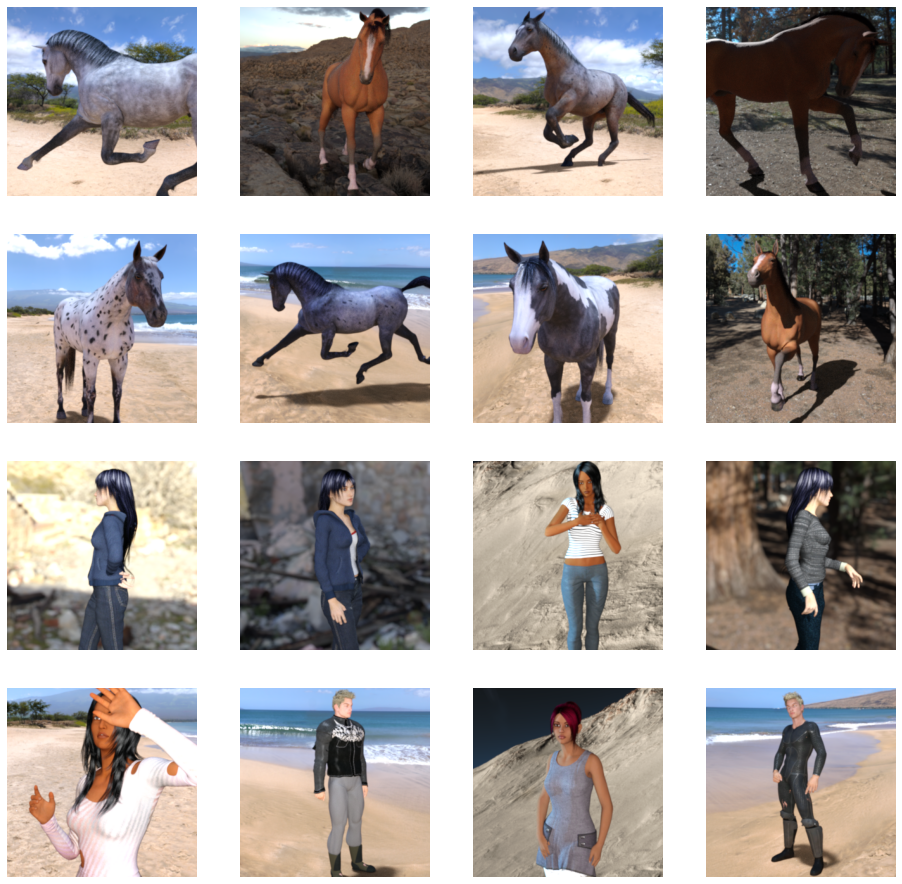

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Build  Model

In [7]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.optimizers import RMSprop

2.4.1


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', 
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

Preprocess data:

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',  # This is the source directory for training images
    target_size = (300, 300),  # resize the images
    batch_size = 128,  # 128 at a time to feed in network.
    class_mode = 'binary'  # if your have 2 classes keep it as binary. 
)


test_datagen = ImageDataGenerator(rescale=1/255)
valid_generator = test_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human/',  # This is the source directory for training images
    target_size = (300, 300),  # resize the images
    batch_size = 128,  # 128 at a time to feed in network.
    class_mode = 'binary'  # if your have 2 classes keep it as binary. 
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


You can specify batches for training. With that, traşning will be faster. If we specify the number of steps to use when training, it increases the performance so that each epoch takes less than 10 seconds.

- amount of item / batch size
- 1024 / 128 = 8
 


In [12]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=valid_generator,
    steps_per_epoch = 8,
    validation_steps = 8,
    verbose=2  #   0 = silent, 1 = progress bar, 2 = one line per epoch.
)

Epoch 1/15
8/8 - 41s - loss: 2.7067 - accuracy: 0.5829 - val_loss: 2.7991 - val_accuracy: 0.5000
Epoch 2/15
8/8 - 7s - loss: 1.1946 - accuracy: 0.6816
Epoch 3/15
8/8 - 7s - loss: 0.2102 - accuracy: 0.9180
Epoch 4/15
8/8 - 6s - loss: 0.0540 - accuracy: 0.9889
Epoch 5/15
8/8 - 6s - loss: 0.7635 - accuracy: 0.8420
Epoch 6/15
8/8 - 6s - loss: 0.0875 - accuracy: 0.9744
Epoch 7/15
8/8 - 6s - loss: 0.0243 - accuracy: 0.9956
Epoch 8/15
8/8 - 6s - loss: 0.0065 - accuracy: 1.0000
Epoch 9/15
8/8 - 6s - loss: 0.0022 - accuracy: 1.0000
Epoch 10/15
8/8 - 6s - loss: 0.0011 - accuracy: 1.0000
Epoch 11/15
8/8 - 6s - loss: 8.9053e-04 - accuracy: 1.0000
Epoch 12/15
8/8 - 6s - loss: 3.3390e-04 - accuracy: 1.0000
Epoch 13/15
8/8 - 6s - loss: 1.7403e-04 - accuracy: 1.0000
Epoch 14/15
8/8 - 6s - loss: 1.1680e-04 - accuracy: 1.0000
Epoch 15/15
8/8 - 6s - loss: 7.3544e-05 - accuracy: 1.0000


I dowloaded some images from the internet and by using the trained model I will predict their classes: 

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving horse1.jpg to horse1 (1).jpg
Saving horse2.jpg to horse2.jpg
Saving horse3.jpg to horse3.jpg
Saving horse4.jpg to horse4.jpg
Saving human1.jpg to human1.jpg
Saving human2.jpg to human2.jpg
Saving human3.jpg to human3.jpg
[4.7395807e-18]
horse1.jpg is a horse
[0.9998264]
horse2.jpg is a human
[1.1554672e-05]
horse3.jpg is a horse
[2.356642e-17]
horse4.jpg is a horse
[0.9999293]
human1.jpg is a human
[0.9982601]
human2.jpg is a human
[0.]
human3.jpg is a horse


"
Note that you might see that the network makes a LOT of mistakes, despite the fact that the training accuracy is above 99%.

This is due to something called overfitting, which means that the neural network is trained with very limited data -- there are only 500ish images of each class. So it's very good at recognizing images that look like those in the training set, but it can fail a lot at images that are not in the training set.
"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


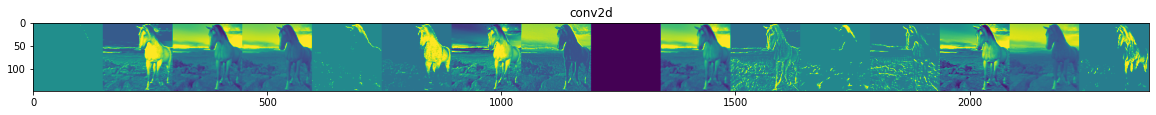

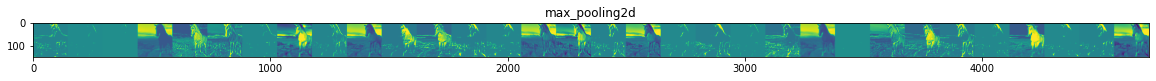

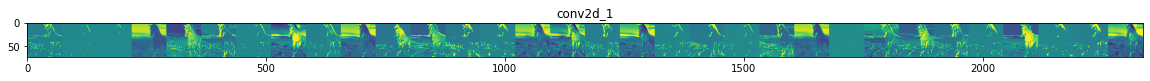

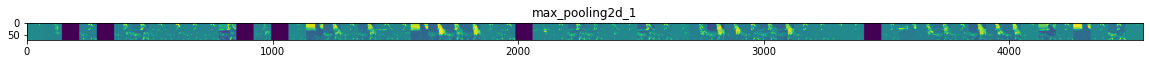

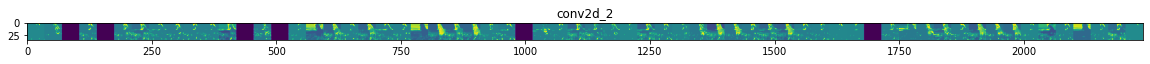

In [24]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      #if x>0:
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

"As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.

These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline."

In [ ]:
#  terminate the kernel and free memory resources:

import os, signal
os.kill(os.getpid(), signal.SIGKILL)